### Compare different epsilon values in explore-exploit for multi-armed bandit with 3 bandits

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from epsilon_greedy import Bandit

In [2]:
def run_3_bandit_experiment(mean1,mean2,mean3,epsilon=0.1,N=10):
    bandits = [Bandit(mean1),Bandit(mean2),Bandit(mean3)]
    
    rewards = np.empty(N)
    
    for i in range(N):
        # epsilon-greedy: explore with a probability of epsilon, exploit with a probability 1-epsilon
        explore_prob = np.random.random()
        
        # select the bandit to pull by deciding between explore/exploit
        if explore_prob <= epsilon: #explore
            bandit_to_pull = np.random.choice(3)
        else: #exploit the best bandit(using the estimated mean reward rate)
            bandit_to_pull = np.argmax([bandit.estimate_mean for bandit in bandits]) 
            
        x = bandits[bandit_to_pull].pull() #pull the selected bandit and get a reward
        bandits[bandit_to_pull].update(x) #update the estimate mean of selected bandit
        
        rewards[i] = x
        
    #for plotting: moving average (the average total reward in every step)
    cumulative_average_reward  = np.cumsum(rewards) / (np.arange(N)+1)
    
    plt.plot(cumulative_average_reward)
    plt.plot(np.ones(N)*mean1) 
    plt.plot(np.ones(N)*mean2)
    plt.plot(np.ones(N)*mean3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print("Real mean:",b.mean, "Estimated mean:",b.estimate_mean)
        
    return cumulative_average_reward

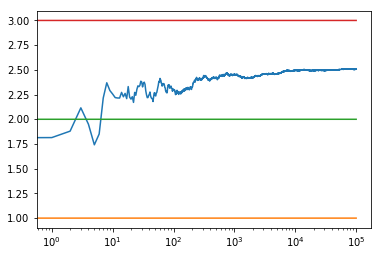

Real mean: 1.0 Estimated mean: 1.0056000215439351
Real mean: 2.0 Estimated mean: 2.005160597741283
Real mean: 3.0 Estimated mean: 3.003226437596034


In [3]:
cumulative_5 =  run_3_bandit_experiment(1.0,2.0,3.0,0.5,100000)

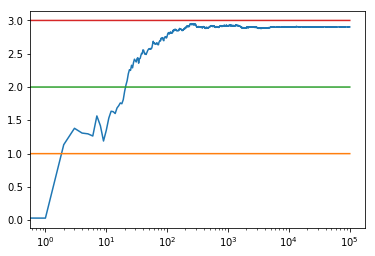

Real mean: 1.0 Estimated mean: 1.0108784207886743
Real mean: 2.0 Estimated mean: 2.0071258368687817
Real mean: 3.0 Estimated mean: 3.0027979238216327


In [4]:
cumulative_1 = run_3_bandit_experiment(1.0,2.0,3.0,0.1,100000)


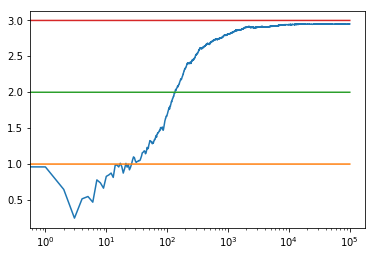

Real mean: 1.0 Estimated mean: 0.9946759188320187
Real mean: 2.0 Estimated mean: 2.005613666508415
Real mean: 3.0 Estimated mean: 3.001119864171822


In [5]:
cumulative_05  = run_3_bandit_experiment(1.0,2.0,3.0,0.05,100000)

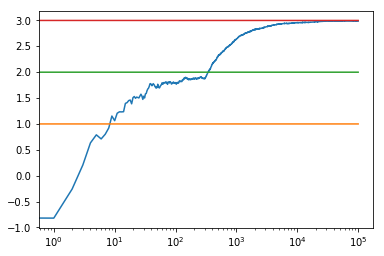

Real mean: 1.0 Estimated mean: 1.0865944844603945
Real mean: 2.0 Estimated mean: 1.9480978019242776
Real mean: 3.0 Estimated mean: 2.9999061273492402


In [6]:
cumulative_01 = run_3_bandit_experiment(1.0,2.0,3.0,0.01,100000)

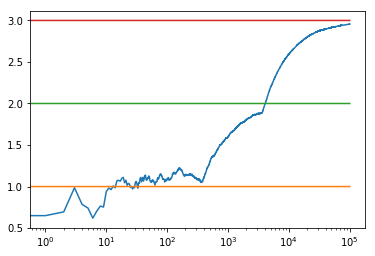

Real mean: 1.0 Estimated mean: 1.051263858013318
Real mean: 2.0 Estimated mean: 1.9857521269472833
Real mean: 3.0 Estimated mean: 2.996434781521586


In [7]:
cumulative_001 = run_3_bandit_experiment(1.0,2.0,3.0,0.001,100000)

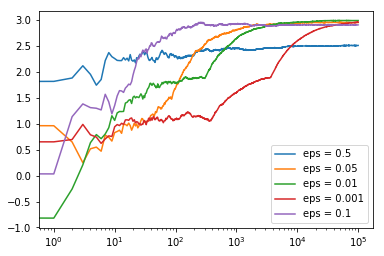

In [9]:
plt.plot(cumulative_5,label="eps = 0.5")
plt.plot(cumulative_05,label="eps = 0.05")
plt.plot(cumulative_01,label ="eps = 0.01")
plt.plot(cumulative_001,label="eps = 0.001")
plt.plot(cumulative_1,label ="eps = 0.1")

plt.legend()
plt.xscale('log')
plt.show()

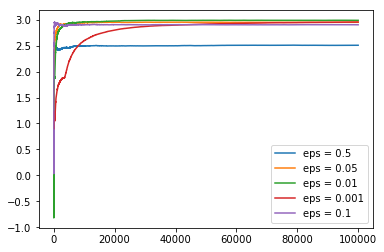

In [10]:
plt.plot(cumulative_5,label="eps = 0.5")
plt.plot(cumulative_05,label="eps = 0.05")
plt.plot(cumulative_01,label ="eps = 0.01")
plt.plot(cumulative_001,label="eps = 0.001")
plt.plot(cumulative_1,label ="eps = 0.1")

plt.legend()
plt.show()

## Conclusion
It seems that smaller epsilons take longer to converge, but a very large epsilon(0.5) does not converge at all , best value in this experiment was 0.1